In [68]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [69]:
temp_df = pd.read_csv('chicago.csv', parse_dates=['Date'], dayfirst=True)

In [70]:
temp_df['Latitude'].unique()

array([ 41.86407316,  41.78292153,  41.89490828, ...,  41.92060646,
        41.81081552,  41.86718783])

In [71]:
    temp_df['Longitude'].unique()

array([-87.70681861, -87.60436317, -87.75837196, ..., -87.74451657,
       -87.5891324 , -87.71644019])

In [72]:

not_empty_row = pd.notnull(temp_df['Latitude'])
not_empty_row

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
1048545    True
1048546    True
1048547    True
1048548    True
1048549    True
1048550    True
1048551    True
1048552    True
1048553    True
1048554    True
1048555    True
1048556    True
1048557    True
1048558    True
1048559    True
1048560    True
1048561    True
1048562    True
1048563    True
1048564    True
1048565    True
1048566    True
1048567    True
1048568    True
1048569    True
1048570    True
1048571    True
1048572    True
1048573    True
1048574    True
Name: Latitude, Length: 

In [73]:
temp_df = temp_df[not_empty_row]
temp_df['Latitude'].unique()

array([ 41.86407316,  41.78292153,  41.89490828, ...,  41.92060646,
        41.81081552,  41.86718783])

In [74]:

# Cek for longitude
temp_df['Longitude'].unique()

array([-87.70681861, -87.60436317, -87.75837196, ..., -87.74451657,
       -87.5891324 , -87.71644019])

In [75]:
unique_primary_type = temp_df['Primary Type'].unique()
unique_primary_type

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [76]:
temp_df['Primary Type'].value_counts()

THEFT                                235197
BATTERY                              187647
NARCOTICS                            109721
CRIMINAL DAMAGE                      108512
ASSAULT                               63679
OTHER OFFENSE                         61263
BURGLARY                              61049
DECEPTIVE PRACTICE                    46683
MOTOR VEHICLE THEFT                   43787
ROBBERY                               39494
CRIMINAL TRESPASS                     27461
WEAPONS VIOLATION                     12090
PUBLIC PEACE VIOLATION                10288
OFFENSE INVOLVING CHILDREN             7591
PROSTITUTION                           6311
INTERFERENCE WITH PUBLIC OFFICER       4575
CRIM SEXUAL ASSAULT                    4275
SEX OFFENSE                            3205
GAMBLING                               1853
LIQUOR LAW VIOLATION                   1588
ARSON                                  1448
KIDNAPPING                              786
STALKING                        

In [77]:
def normalization(x):
    mean = x.mean()
    std = x.std()
    temp = []
    for i in range(len(x)):
        val = x.iloc[i]
        temp.append((val-mean)/std)
    array = np.array(temp)
    return array

temp_df['Beat'] = normalization(temp_df['Beat'])
temp_df['District'] = normalization(temp_df['District'])
temp_df['Ward'] = normalization(temp_df['Ward'])
temp_df['Community Area'] = normalization(temp_df['Community Area'])
temp_df['Latitude'] = normalization(temp_df['Latitude'])
temp_df['Longitude'] = normalization(temp_df['Longitude'])

In [78]:
temp_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,2016-03-05 23:40:00,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,-0.187749,-0.183144,0.086278,-0.401439,08B,1154907.0,1893681.0,2016,5/10/2016 15:56,0.238977,-0.498552,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-03-05 21:40:00,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,-1.212424,-1.196810,-0.204454,0.204659,08B,1183066.0,1864330.0,2016,5/10/2016 15:56,-0.595010,0.984168,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-03-05 23:31:00,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,0.537762,0.540903,1.031158,-0.587931,24,1140789.0,1904819.0,2016,5/10/2016 15:56,0.555866,-1.244624,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-03-05 22:10:00,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,0.549324,0.540903,0.377011,-0.587931,08B,1143223.0,1901475.0,2016,5/10/2016 15:56,0.461098,-1.116461,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-03-05 22:00:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,0.536317,0.540903,0.377011,-0.587931,6,1139890.0,1901675.0,2016,5/10/2016 15:56,0.467371,-1.293520,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,2016-03-05 22:35:00,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,-0.752837,-0.762382,-1.076651,0.297905,04B,1183336.0,1850642.0,2016,5/10/2016 15:56,-0.981087,0.992334,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,2016-03-05 22:30:00,027XX S STATE ST,460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,-1.472567,-1.486429,-1.440066,-0.121702,08B,1176730.0,1886544.0,2016,5/10/2016 15:56,0.032931,0.657682,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,2016-03-05 21:30:00,002XX E 46TH ST,460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,-1.354057,-1.341619,-1.440066,0.018167,08B,1178514.0,1874573.0,2016,5/10/2016 15:56,-0.305074,0.747154,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,2016-03-05 16:00:00,014XX W DEVON AVE,460,BATTERY,SIMPLE,SIDEWALK,False,False,1.850040,1.844188,1.249208,-1.706882,08B,1165696.0,1942616.0,2016,5/10/2016 15:56,1.616671,0.094860,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,2016-03-05 22:30:00,069XX S ASHLAND AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,-0.602532,-0.617572,-0.422503,1.370233,08B,1166876.0,1858796.0,2016,5/10/2016 15:56,-0.747362,0.122870,"(41.768096835, -87.663878589)"


In [79]:
import os
import sys

In [80]:
spark_path = "E:/spark"
os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
os.environ['PYSPARK_PYTHON'] = sys.executable

In [81]:
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

In [82]:
from pyspark import SparkContext
from pyspark import SparkConf

In [83]:
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

In [84]:
sc = SparkContext("local", conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at <ipython-input-20-7b39743a02ce>:1 

In [ ]:
print sc

In [85]:
ronaldo = temp_df['Arrest'].values.tolist()
cr = []
for i in range(len(ronaldo)):
    if ronaldo[i]:
        cr.append(1)
    else:
        cr.append(0)
new = np.array(cr)
temp_df['Arrest'] = new
temp_df['Arrest']

0          1
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         1
11         1
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1048545    1
1048546    0
1048547    1
1048548    1
1048549    1
1048550    1
1048551    1
1048552    1
1048553    0
1048554    0
1048555    1
1048556    0
1048557    0
1048558    1
1048559    1
1048560    0
1048561    1
1048562    0
1048563    1
1048564    0
1048565    1
1048566    0
1048567    0
1048568    0
1048569    0
1048570    0
1048571    0
1048572    1
1048573    0
1048574    0
Name: Arrest, Length: 1039870, dtype: int32

In [86]:
temp_df['Beat']

0         -0.187749
1         -1.212424
2          0.537762
3          0.549324
4          0.536317
5         -0.752837
6         -1.472567
7         -1.354057
8          1.850040
9         -0.602532
10        -1.182074
11         0.985786
12         0.115752
13        -1.472567
14         0.407690
15        -0.463789
16         0.393238
17        -1.339605
18         1.560992
19        -1.343941
20         0.393238
21        -1.325153
22         1.127420
23         0.663498
24         0.981451
25         1.547985
26         1.127420
27        -0.342389
28        -0.478242
29        -0.778852
             ...   
1048545   -1.197971
1048546   -0.348170
1048547   -1.052002
1048548   -1.474012
1048549   -0.057677
1048550    0.115752
1048551   -1.199417
1048552    0.391793
1048553   -1.197971
1048554   -1.182074
1048555    0.534871
1048556    0.534871
1048557   -0.041779
1048558    1.996009
1048559    1.980111
1048560   -1.359838
1048561   -0.605423
1048562    1.560992
1048563   -0.458008


In [87]:
beat=[]
arrest=[]

for i in range(len(temp_df['Arrest'])):
    beat.append(temp_df['Beat'].iloc[i])
    arrest.append(temp_df['Arrest'].iloc[i])

In [88]:
a=[]
for i in range(len(temp_df['Arrest'])):
    a.append([beat[i],arrest[i]])


In [89]:
print a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [90]:
from pyspark.mllib.clustering import KMeans, KMeansModel

In [91]:
tes_rdd=sc.parallelize(a)

In [92]:
clusters = KMeans.train(tes_rdd, 2, maxIterations=10, initializationMode="random")

In [93]:
print clusters.clusterCenters

[array([ 1.11944393,  0.2490266 ]), array([-0.66510321,  0.29740353])]


In [94]:
cluster_1 = []
cluster_2 = []
for i in range(len(a)):
    cls = clusters.predict(a[i])
    if cls == 0:
        cluster_1.append(a[i])
    elif cls == 1:
        cluster_2.append(a[i])

In [95]:
print len(cluster_1)
print len(cluster_2)
print len(a)

387561
652309
1039870


In [96]:
import matplotlib.pyplot as plt

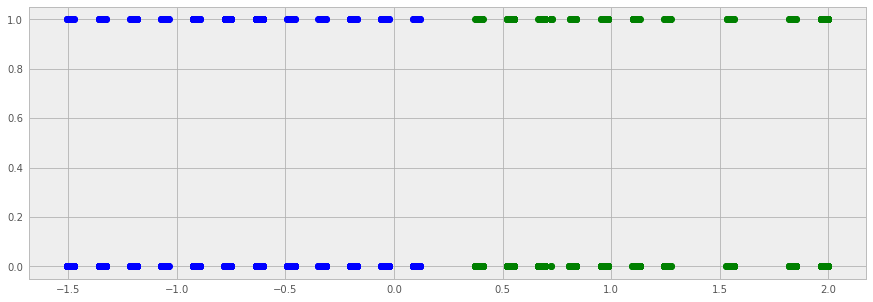

In [100]:
for i in range(1000):
    line = plt.plot(cluster_1[i][0], cluster_1[i][1], "ro")
    plt.setp(line, color="g", linewidth=2.0)
for i in range(1000):
    line = plt.plot(cluster_2[i][0], cluster_2[i][1], "ro")
    plt.setp(line, color="b", linewidth=2.0)

In [99]:
plt.show()